# Trabalho 2

* Aluno : Gabriel Borin Macedo
* RA : 197201

## Descrição do trabalho

## Parte 0 : criação de função úteis para o programa

Inicialmente, será definido algumas funções úteis para este _notebook_

In [10]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

from glob import glob
from skimage.measure import label, regionprops_table


def read_images(images_path: list[str]) -> tuple[list, list]:
    """
    Função que realiza a leitura de imagens no diretório e retorna uma tupla de lista que contém
    respectivamente as imagens monocromáticas e no padrão RGB

    Args:
        images_path (list[str]): lista de strings que contém o caminho para leitura de todas as imagens

    Notes:
        esse código foi baseado neste (https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#:~:text=The%20conversion%20from%20a%20RGB,done%20with%20cv%3A%3AmixChannels.)

    Returns (tuple[list, list]):
        retorna uma tupla que contém respectivamente as imagens monocromáticas e no padrão RGB

    """

    gray_images_vec = []
    rgb_images_vec = []

    for img_path in images_path:
        print("Lendo a imagem de nome {}".format(img_path))

        # Estamos lendo a imagem em BGR e depois convertendo para RGB
        img_rgb = cv2.imread(img_path)[..., ::-1]

        # Fazendo a conversão de RGB para escala de cinza
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        gray_images_vec.append(img_gray)
        rgb_images_vec.append(img_rgb)

    return gray_images_vec, rgb_images_vec


def plot_figures_in_line(first_img: np.ndarray, second_img: np.ndarray, title1: str = "",
                         title2: str = "", **kwargs: dict) -> None:
    """
    Função que realiza a plotagem de duas imagens na horizontal. Mais precisamente, a imagem colorida é apresentado mais à esquerda
    enquanto que a imagem monocromática é apresentada na direita

    Args:
        first_img (np.ndarray): um vetor que representa a imagem na escala rgb
        second_img (np.ndarray): um vetor que representa a imagem na escala de cinza
        title1 (str): string que representa o título da imagem rgb
        title2 (str): string que representa o título da imagem monocromática
        **kwargs (dict): dicionário que contém os parâmetros de salvar a imagem, o tamanho da figura e se o png será salvo como uma figura transparente

    Returns (None):

    """

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    if "figsize" in kwargs.keys():
        figsize_val = kwargs.pop("figsize")

    else:
        figsize_val = (15, 15)

    if "fontsize_title" in kwargs.keys():
        fontsize_title = kwargs.pop("fontsize_title")

    else:
        fontsize_title = 20

    if "first_cmap" in kwargs.keys():
        first_cmap = kwargs.pop("first_cmap")

    else:
        first_cmap = None

    if "second_cmap" in kwargs.keys():
        second_cmap = kwargs.pop("second_cmap")

    else:
        second_cmap = None

    fig, ax = plt.subplots(1, 2, figsize=figsize_val)

    # Plot da imagem rgb

    if first_img is not None:
        ax[0].imshow(first_img, cmap=first_cmap, vmin=first_img.min(), vmax=first_img.max())

    else:
        ax[0].imshow(first_img, vmin=first_img.min(), vmax=first_img.max())

    ax[0].set_title(title1, fontsize=fontsize_title)

    # Plot da imagem em tom de cinza
    if second_cmap is not None:
        ax[1].imshow(second_img, cmap=second_cmap, vmin=second_img.min(), vmax=second_img.max())

    else:
        ax[1].imshow(second_img, vmin=second_img.min(), vmax=second_img.max())

    ax[1].set_title(title2, fontsize=fontsize_title)

    for a in ax:
        a.axis("off")
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()


def extract_image_info(image: np.ndarray) -> tuple[pd.DataFrame, np.ndarray]:
    """
    Função que extrai as informações de área, perimetro, ecentricidade e solidez dos objetos de uma imagem e retorna
    um p.Dataframe que contém estas informações

    Args:
        image (np.ndarray): imagem de entrada

    Returns (pd.DataFrame):
        retorna um dataframe que contém as informações de área, perimetro, ecentricidade e solidez dos objetos de uma imagem.

    """

    label_img = label(image) - 1
    print("total de objetos detectados : {}".format(label_img.max()))
    props = regionprops_table(label_img, properties=("area",
                                                     "perimeter",
                                                     "eccentricity",
                                                     "solidity",
                                                     "centroid",
                                                     "moments"))
    df = pd.DataFrame(props)
    return df, label_img

## Parte 1 : Conversão de imagens no tom de cinza para a escala monocromática

[#TODO] : Preciso escrever a parte teórica deste tópico. Eu deixei _linkado_ na parte da leitura de imagens uma doc de examplo para conversão de rgb para escala monocromática

### Leitura do caminho das imagens

Inicialmente, será definido o caminho para a leitura das imagens utilizando a biblioteca _glob_

In [11]:
image_files_path = sorted(glob("Imagens/*"))
gray_images, rgb_images = read_images(image_files_path)

Lendo a imagem de nome Imagens/objetos1.png
Lendo a imagem de nome Imagens/objetos2.png
Lendo a imagem de nome Imagens/objetos3.png


libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50


Lendo a imagem de nome Imagens/objetos1.png
Lendo a imagem de nome Imagens/objetos2.png
Lendo a imagem de nome Imagens/objetos3.png


libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'default_rgb.icc': 0h: PCS illuminant is not D50


### Função para leitura e plotagem das imagens

Agora,será feito uma célula que pega as imagens rgb e em escala de cinza e realiza o _plot_ das imagens

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)
Dimensão da imagem rgb : (327, 563, 3)


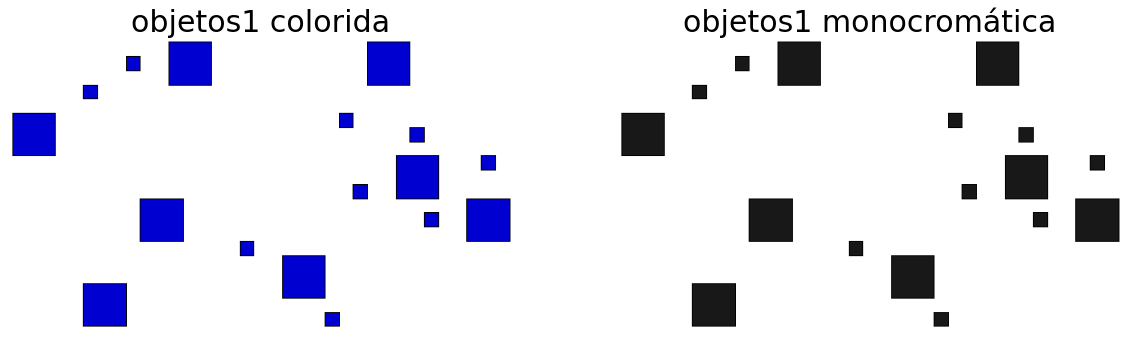

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)
Dimensão da imagem rgb : (343, 563, 3)


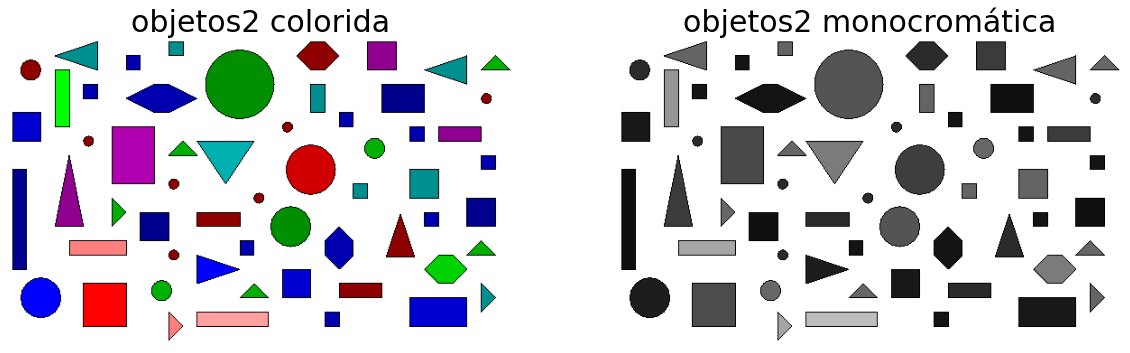

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)
Dimensão da imagem rgb : (238, 238, 3)


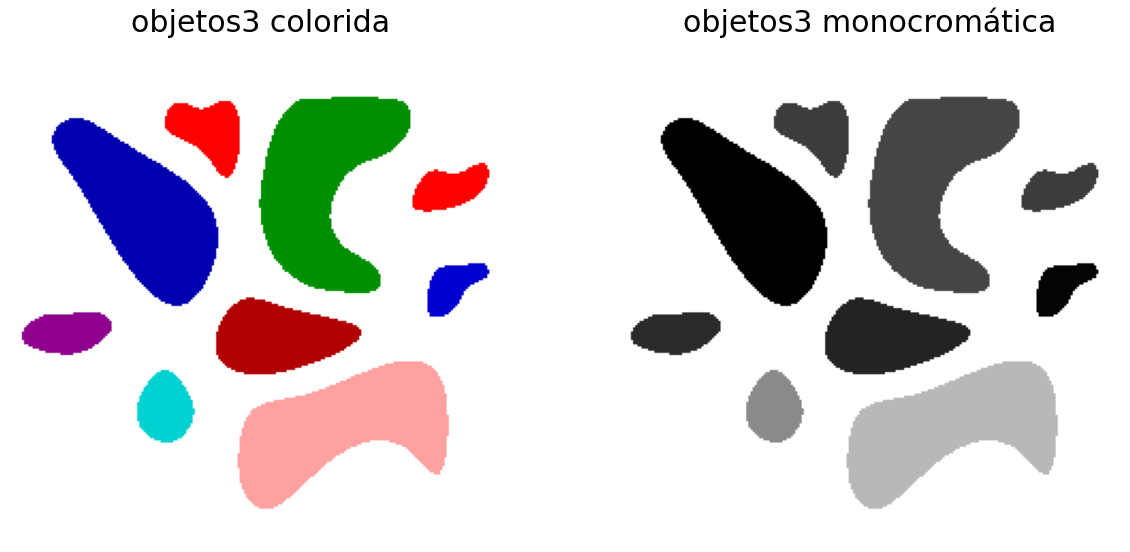

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)
Dimensão da imagem rgb : (327, 563, 3)


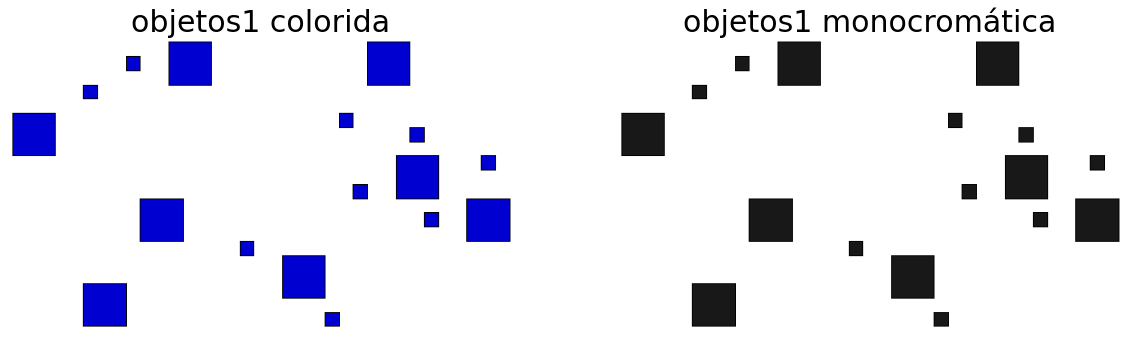

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)
Dimensão da imagem rgb : (343, 563, 3)


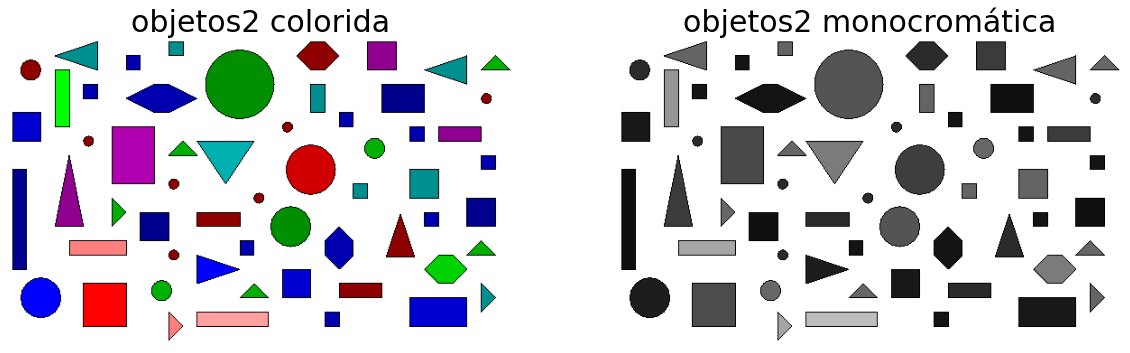

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)
Dimensão da imagem rgb : (238, 238, 3)


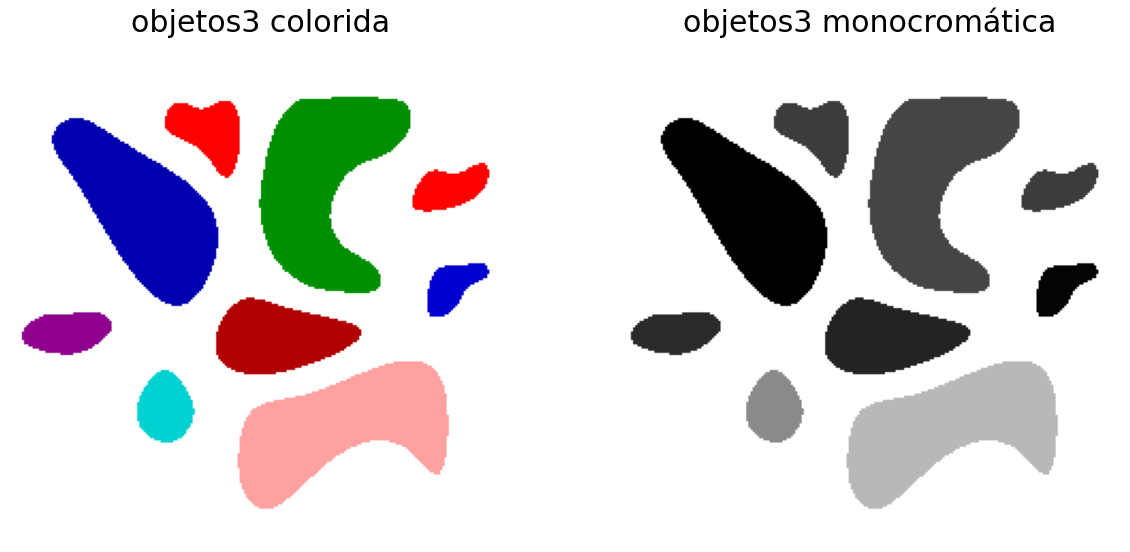

In [12]:
for gray_img, rgb_img, image_name in zip(gray_images, rgb_images, image_files_path):
    # Manipulação da string para se obter o nome do arquivo de imagem
    img_name = image_name.split("/")[-1].split(".")[0]

    print("Nome da imagem de entrada : {}".format(img_name))
    print("Dimensão da imagem monocromática : {}".format(gray_img.shape))
    print("Dimensão da imagem rgb : {}".format(rgb_img.shape))

    plot_figures_in_line(rgb_img, gray_img, title1="{} colorida".format(img_name),
                         title2="{} monocromática".format(img_name),
                         save_dir="ResultadoImagens/ConversaoCores/",
                         save_fig="{}Convertida.png".format(img_name),
                         second_cmap="gray",
                         figsize=(20, 20),
                         fontsize_title=30)

## Parte 2 : Detecção de bordas em imagens
https://stackoverflow.com/questions/67255626/cv2-drawcontours-doesnt-display-all-the-contours
https://learnopencv.com/contour-detection-using-opencv-python-c/

In [13]:
def get_image_contorn(gray_img: np.ndarray, rgb_image: np.ndarray, file_name: str, t_min: int = 30, t_max: int = 200,
                      plot_image: bool = True, **kwargs: dict) -> tuple[np.ndarray, np.ndarray]:
    """
    Função que extrai os cortonos de uma imagem e retorna uma imagem que contém os cortornos dos objetos da imagem

    Args:
        gray_img (np.ndarray): imagem monocromática
        rgb_image (np.ndarray): imagem na escala RGB
        file_name (str): string que representa o nome do arquivo das imagens
        t_min (int): valor opcional para de threshold mínimo para se utilizar no algorítmo dc v2.threshold. O seu valor padrão é 30
        t_max (int): valor opcional para de threshold máximo para se utilizar no algorítmo do cv2.threshold. O seu valor padrão é 200
        plot_image (bool): boleano que representa
        **kwargs (dict): dicionário que contém alguns parâmetros opcionais tais como a cor para demonstração dos contornos, tamanho da figura e o tamanho da fonte

    Returns:
        (np.ndarray): Retorna a imagem com os contornos dos objetos detectados

    """

    if "color_mask" in kwargs.keys():
        color_mask = kwargs.pop("color_mask")

    else:
        np.random.seed(31)
        color_mask = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

    if "figsize" in kwargs.keys():
        figsize_val = kwargs.pop("figsize")

    else:
        figsize_val = (20, 20)

    if "fontsize_title" in kwargs.keys():
        fontsize_title = kwargs.pop("fontsize_title")

    else:
        fontsize_title = 20

    # Manipulação da string para se obter o nome do arquivo de imagem
    img_name = file_name.split("/")[-1].split(".")[0]

    print("Nome da imagem de entrada : {}".format(img_name))
    print("Dimensão da imagem monocromática : {}".format(gray_img.shape))

    _, threshold_values = cv2.threshold(gray_img, t_min, t_max,
                                        cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(threshold_values, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Agora, iremos desenhar o contorno tanto para a imagem original

    # Esta função cria uma imagem com
    img_with_contorns = cv2.drawContours(np.ones_like(rgb_image) * 255, contours, -1, color_mask, 2).astype(np.uint8)

    img_with_mask = cv2.drawContours(rgb_image.astype(np.float32), contours, -1, color_mask, 2).astype(np.uint8)

    if plot_image:
        plot_figures_in_line(img_with_contorns, img_with_mask, title1="contorno da imagem {}".format(img_name),
                             title2="contornos da imagem {} aplicado na imagem original".format(img_name),
                             save_dir="ResultadoImagens/Contorno/",
                             save_fig="{}Contorno.png".format(img_name),
                             figsize=figsize_val,
                             fontsize_title=fontsize_title)

    return contours, img_with_contorns

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)


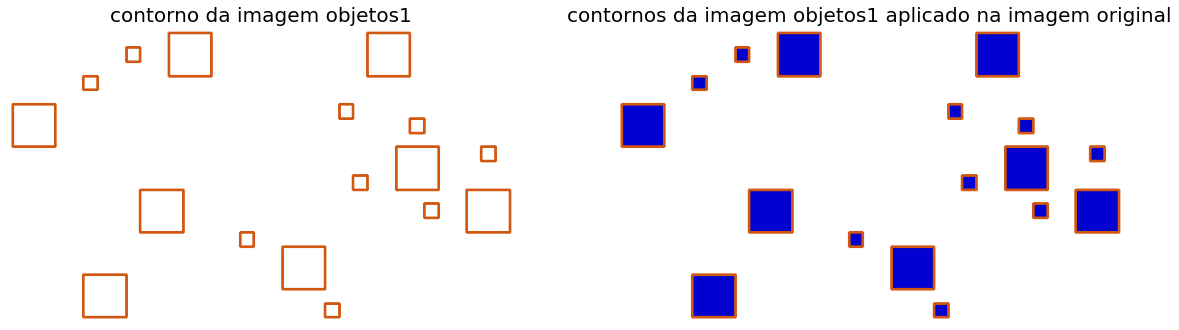

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)


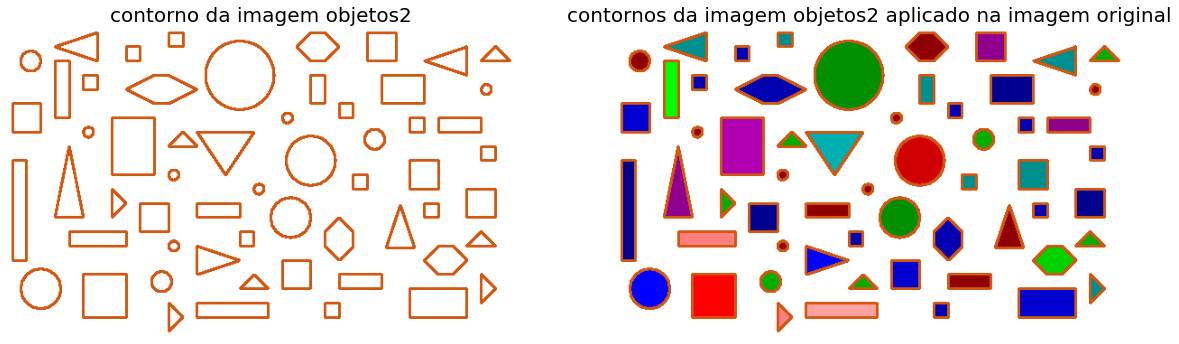

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)


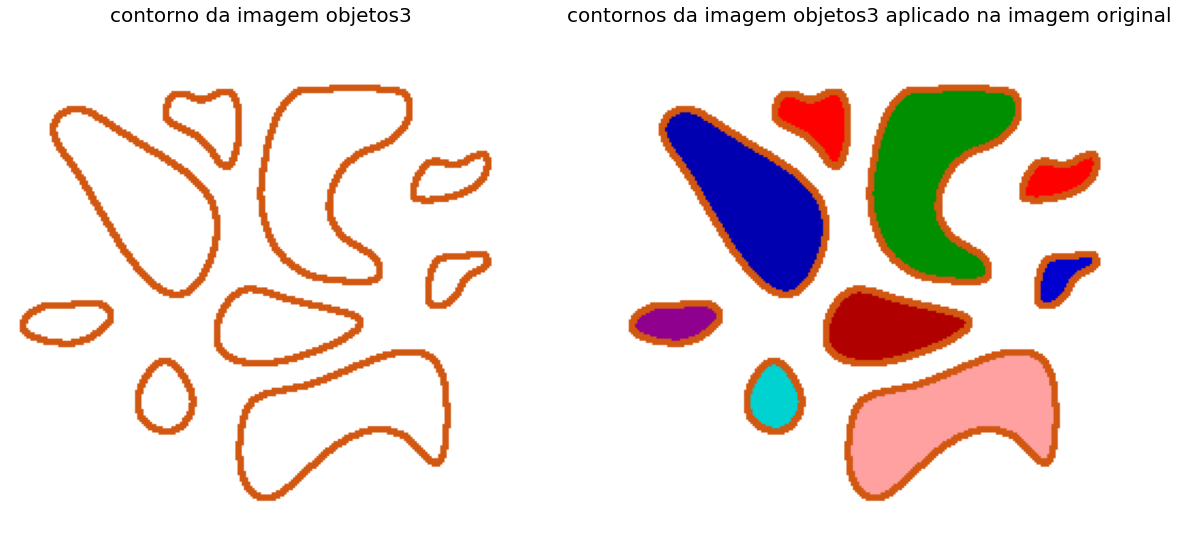

Nome da imagem de entrada : objetos1
Dimensão da imagem monocromática : (327, 563)


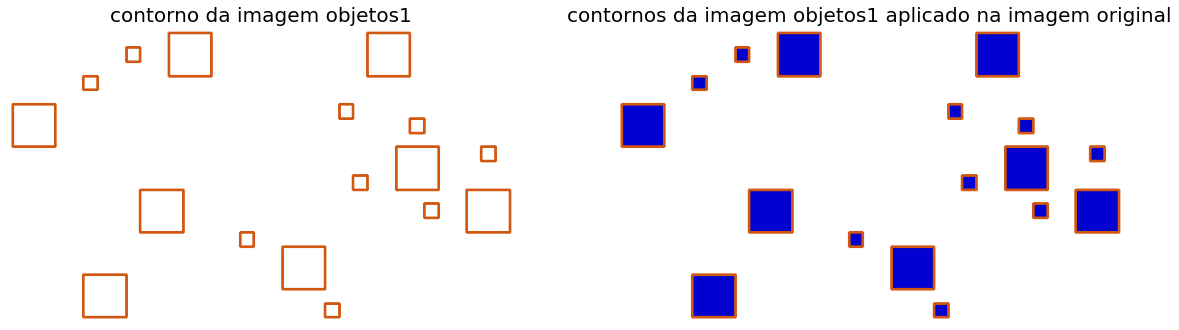

Nome da imagem de entrada : objetos2
Dimensão da imagem monocromática : (343, 563)


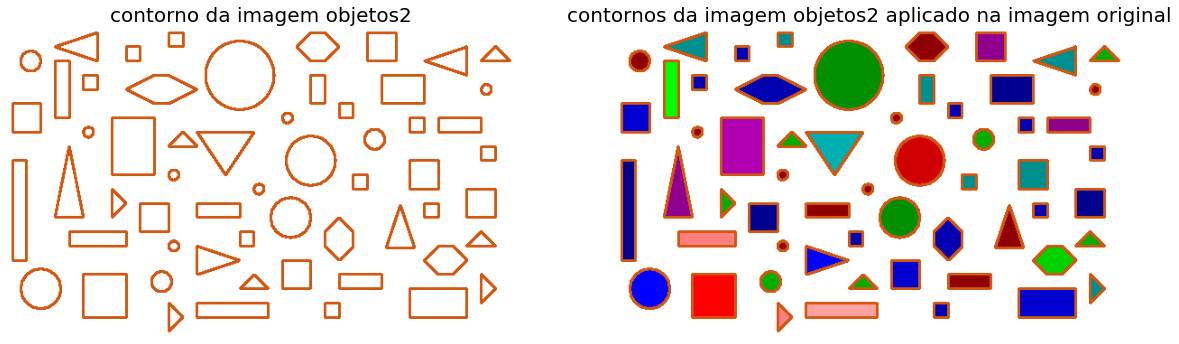

Nome da imagem de entrada : objetos3
Dimensão da imagem monocromática : (238, 238)


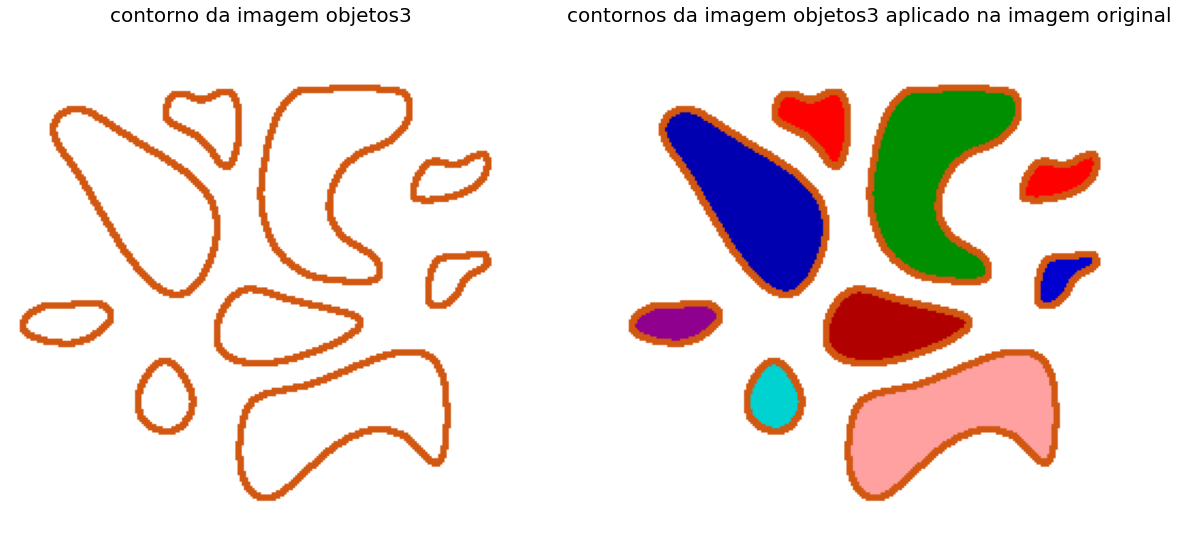

In [14]:
images_contorns = []

for gray_img, rgb_image, image_name in zip(gray_images, rgb_images, image_files_path):
    img_contorn, _ = get_image_contorn(gray_img, rgb_image, image_name, t_min=190, t_max=255)
    images_contorns.append(img_contorn)

## Parte 3 : Extração de propriedades dos objetos.
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html
https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

In [15]:
def place_text_to_objects(gray_img: np.ndarray, file_name: str, rgb_img: np.ndarray,
                          color: tuple[int, int, int] = (0, 0, 0), thickness: int = 1,
                          fig_size: tuple[int, int] = (10, 10), move_centroid: tuple[float, float] = (0.0, 0.0),
                          **kwargs: dict) -> tuple[np.ndarray, list[int]]:
    """

    Função que identifica todos os objetos de uma imagem, identificando algumas propriedades destas regiões tais como área, perímetro, excentricidade, solidez
    e as coordenadas aproximadas dos centroides de cada objeto. Por fim, é feito uma plotagem de todas as regiões encontradas e rotuladas.

    Notes:
         O número da região em cada rótulo são postos utilizando o centroide de cada objeto e usando a biblioteca do Skckitimage

    Args:
        gray_img (np.ndarray): imagem monocromática
        file_name (str): nome do arquivo da imagem
        rgb_img (np.ndarray): imagem na escala RGB
        color (tuple[int, int, int]): tupla de 3 coordenadas utilizada para representar a cor do texto na região de label. O valor padrão é de (0, 0, 0)
        thickness (int): valor inteiro que representa a "grossura" do texto na rotulação. O valor padrão é 1
        fig_size (tuple[int, int]): valor utitlizado para definir o tamanho do plot da imagem. O valor padrão é de (10, 10)
        move_centroid (tuple[float, float]): valor utilizado para mover o número de rotulação de cada objeto. O valor padrão é de (0.0, 0.0)
        **kwargs (dict): dicionário que contém argumentos de imagem com apenas as bordas dos objetos e os valores de threshold mínimo e máximo para serem utilizados

    Returns (tuple[np.ndarray, list[int]]):


    """

    np.random.seed(31)

    if "img_contorn" in kwargs.keys():
        img_contorn = kwargs.pop("img_contorn")

    else:
        if "t_min" in kwargs.keys():
            t_min = kwargs.pop("t_min")

        else:
            t_min = 190

        if "t_max" in kwargs.pop("t_max"):
            t_max = kwargs.pop("t_max")

        else:
            t_max = 255

        img_contorn = get_image_contorn(gray_img, rgb_image, image_name, t_min=t_min, t_max=t_max)

    # Manipulação da string para se obter o nome do arquivo de imagem
    img_name = file_name.split("/")[-1].split(".")[0]

    text_to_print = 50 * "=" + " {} ".format(img_name) + 50 * "="

    # extraindo as informações dos objetos pertencentes na imagem
    df_info_objs, _ = extract_image_info(gray_img)
    area_list_val = []

    object_index = 0
    img_with_text = np.ones_like(rgb_img) * 255

    # percorrendo o total de objetos da imagem e preenchendo a imagem de borda com a cor de label desejada
    for _ in img_contorn:
        img_with_text = cv2.drawContours(img_with_text, img_contorn, object_index,
                                         (np.random.randint(190, 254), np.random.randint(190, 254),
                                          np.random.randint(190, 254)), -1)
        object_index += 1

    # para esta parte, é extraido todas as característias dos objetos pertencentes da imagem
    print(text_to_print)
    print("Número de regiões : {}\n".format(len(df_info_objs)))
    for i in range(0, len(df_info_objs)):
        area_list_val.append(df_info_objs["area"][i])
        centroid_coord = (
            int(df_info_objs["centroid-1"][i] + move_centroid[0]),
            int(df_info_objs["centroid-0"][i] + move_centroid[1]))

        print("região {}: área {}: perímetro : {} excentricidade : {} solidez : {} ".format(i, df_info_objs["area"][i],
                                                                                            df_info_objs["perimeter"][
                                                                                                i], df_info_objs[
                                                                                                "eccentricity"][i],
                                                                                            df_info_objs["solidity"][
                                                                                                i]))
        print("coordenadas do centroid : (x = {}, y = {})\n".format(centroid_coord[0], centroid_coord[1]))

        # font
        font = cv2.FONT_HERSHEY_SIMPLEX

        font_scale = 0.5

        img_with_text = cv2.putText(img_with_text, "{}".format(i), centroid_coord, font,
                                    font_scale, color, thickness, cv2.LINE_AA)

    print(len(text_to_print) * "=" + "\n")
    plot_figures_in_line(rgb_img, img_with_text, title1="imagem {}".format(img_name),
                         title2="{} rotulada".format(img_name),
                         save_dir="ResultadoImagens/Propriedades/",
                         save_fig="{}Label.png".format(img_name),
                         first_cmap="gray",
                         second_cmap="gray",
                         figsize=fig_size,
                         fontsize_title=25)

    return img_with_text, area_list_val

total de objetos detectados : 17
================================================== objetos1 ==================================================
Número de regiões : 17

região 0: área 2162: perímetro : 182.0 excentricidade : 0.20523051726629585 solidez : 1.0 
coordenadas do centroid : (x = 192, y = 39)

região 1: área 2162: perímetro : 182.0 excentricidade : 0.20523051726629585 solidez : 1.0 
coordenadas do centroid : (x = 412, y = 39)

região 2: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 129, y = 39)

região 3: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 82, y = 70)

região 4: área 2116: perímetro : 180.0 excentricidade : 0.0 solidez : 1.0 
coordenadas do centroid : (x = 19, y = 117)

região 5: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 365, y = 102)

região 6: área 225: perímetro : 56.0 e

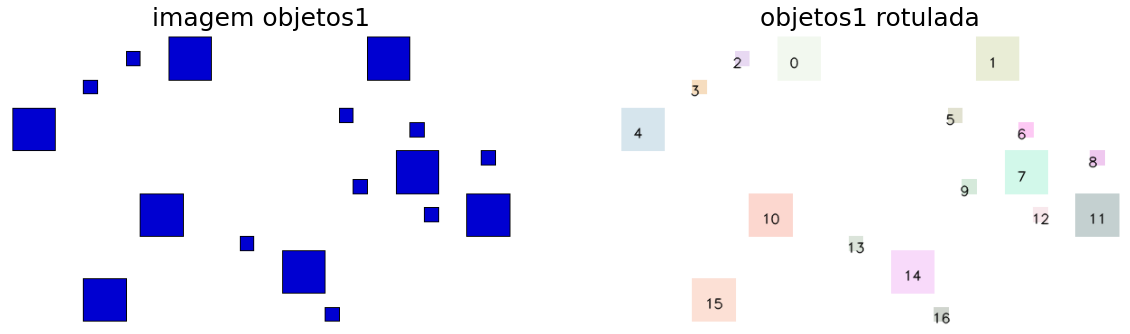

total de objetos detectados : 58
================================================== objetos2 ==================================================
Número de regiões : 58

região 0: área 690: perímetro : 127.18376618407356 excentricidade : 0.8155647091831716 solidez : 0.9610027855153204 
coordenadas do centroid : (x = 76, y = 31)

região 1: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 179, y = 23)

região 2: área 930: perímetro : 113.19595949289334 excentricidade : 0.6509959843025376 solidez : 1.0 
coordenadas do centroid : (x = 336, y = 31)

região 3: área 930: perímetro : 118.0 excentricidade : 0.2520747243709028 solidez : 1.0 
coordenadas do centroid : (x = 407, y = 31)

região 4: área 4402: perímetro : 245.6223663640862 excentricidade : 0.06766830098591488 solidez : 0.9865531151949798 
coordenadas do centroid : (x = 249, y = 62)

região 5: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coor

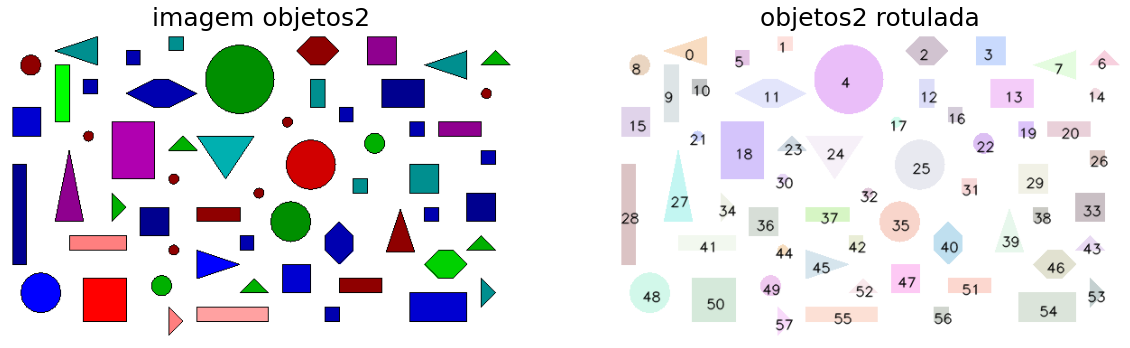

total de objetos detectados : 9
================================================== objetos3 ==================================================
Número de regiões : 9

região 0: área 3969: perímetro : 313.7645019878171 excentricidade : 0.8163620640925742 solidez : 0.7466139954853274 
coordenadas do centroid : (x = 139, y = 78)

região 1: área 791: perímetro : 119.9827560572969 excentricidade : 0.7411034746078128 solidez : 0.8958097395243488 
coordenadas do centroid : (x = 86, y = 53)

região 2: área 3584: perímetro : 259.4629867976521 excentricidade : 0.8980731711879257 solidez : 0.9755035383777899 
coordenadas do centroid : (x = 55, y = 90)

região 3: área 540: perímetro : 99.25483399593904 excentricidade : 0.8895857569166923 solidez : 0.9015025041736227 
coordenadas do centroid : (x = 198, y = 80)

região 4: área 438: perímetro : 88.76955262170047 excentricidade : 0.8559229397121942 solidez : 0.9087136929460581 
coordenadas do centroid : (x = 200, y = 126)

região 5: área 1684: perímet

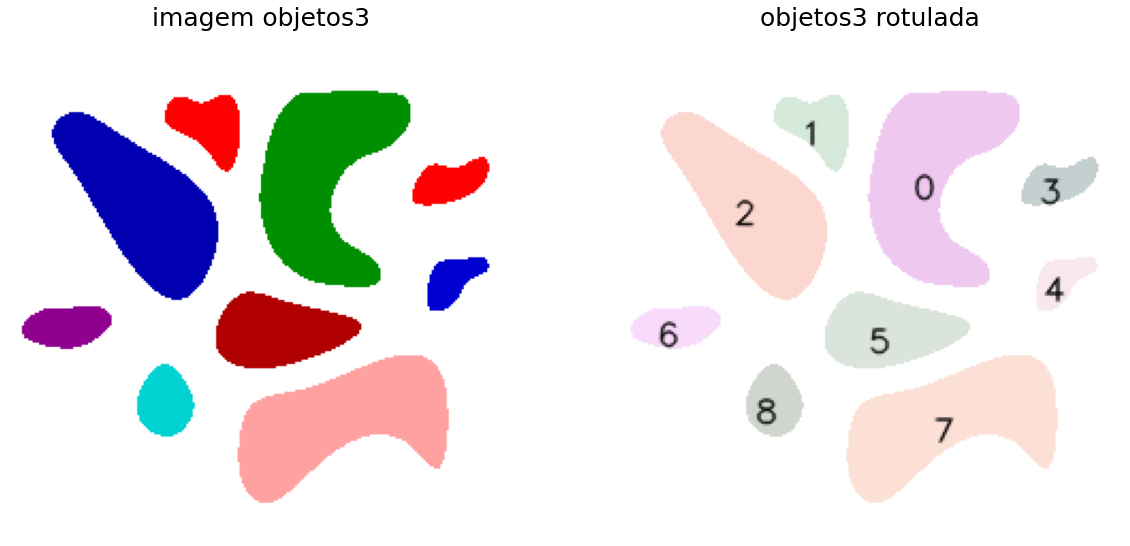

total de objetos detectados : 17
================================================== objetos1 ==================================================
Número de regiões : 17

região 0: área 2162: perímetro : 182.0 excentricidade : 0.20523051726629585 solidez : 1.0 
coordenadas do centroid : (x = 192, y = 39)

região 1: área 2162: perímetro : 182.0 excentricidade : 0.20523051726629585 solidez : 1.0 
coordenadas do centroid : (x = 412, y = 39)

região 2: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 129, y = 39)

região 3: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 82, y = 70)

região 4: área 2116: perímetro : 180.0 excentricidade : 0.0 solidez : 1.0 
coordenadas do centroid : (x = 19, y = 117)

região 5: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 365, y = 102)

região 6: área 225: perímetro : 56.0 e

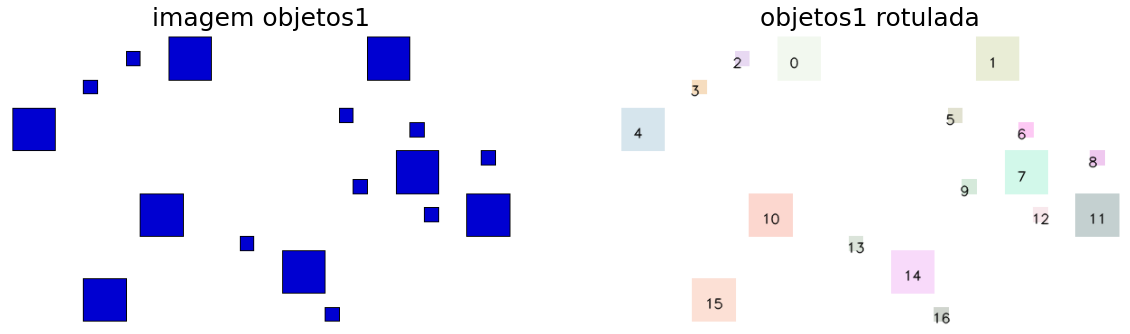

total de objetos detectados : 58
================================================== objetos2 ==================================================
Número de regiões : 58

região 0: área 690: perímetro : 127.18376618407356 excentricidade : 0.8155647091831716 solidez : 0.9610027855153204 
coordenadas do centroid : (x = 76, y = 31)

região 1: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coordenadas do centroid : (x = 179, y = 23)

região 2: área 930: perímetro : 113.19595949289334 excentricidade : 0.6509959843025376 solidez : 1.0 
coordenadas do centroid : (x = 336, y = 31)

região 3: área 930: perímetro : 118.0 excentricidade : 0.2520747243709028 solidez : 1.0 
coordenadas do centroid : (x = 407, y = 31)

região 4: área 4402: perímetro : 245.6223663640862 excentricidade : 0.06766830098591488 solidez : 0.9865531151949798 
coordenadas do centroid : (x = 249, y = 62)

região 5: área 210: perímetro : 54.0 excentricidade : 0.35981145856446234 solidez : 1.0 
coor

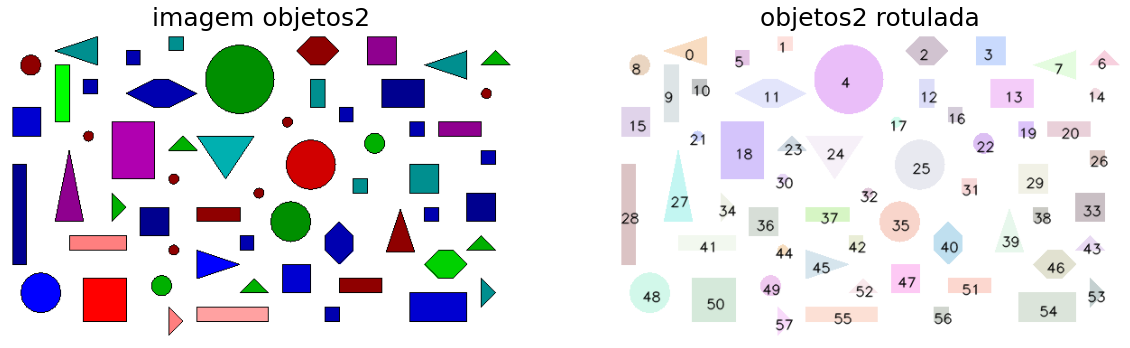

total de objetos detectados : 9
================================================== objetos3 ==================================================
Número de regiões : 9

região 0: área 3969: perímetro : 313.7645019878171 excentricidade : 0.8163620640925742 solidez : 0.7466139954853274 
coordenadas do centroid : (x = 139, y = 78)

região 1: área 791: perímetro : 119.9827560572969 excentricidade : 0.7411034746078128 solidez : 0.8958097395243488 
coordenadas do centroid : (x = 86, y = 53)

região 2: área 3584: perímetro : 259.4629867976521 excentricidade : 0.8980731711879257 solidez : 0.9755035383777899 
coordenadas do centroid : (x = 55, y = 90)

região 3: área 540: perímetro : 99.25483399593904 excentricidade : 0.8895857569166923 solidez : 0.9015025041736227 
coordenadas do centroid : (x = 198, y = 80)

região 4: área 438: perímetro : 88.76955262170047 excentricidade : 0.8559229397121942 solidez : 0.9087136929460581 
coordenadas do centroid : (x = 200, y = 126)

região 5: área 1684: perímet

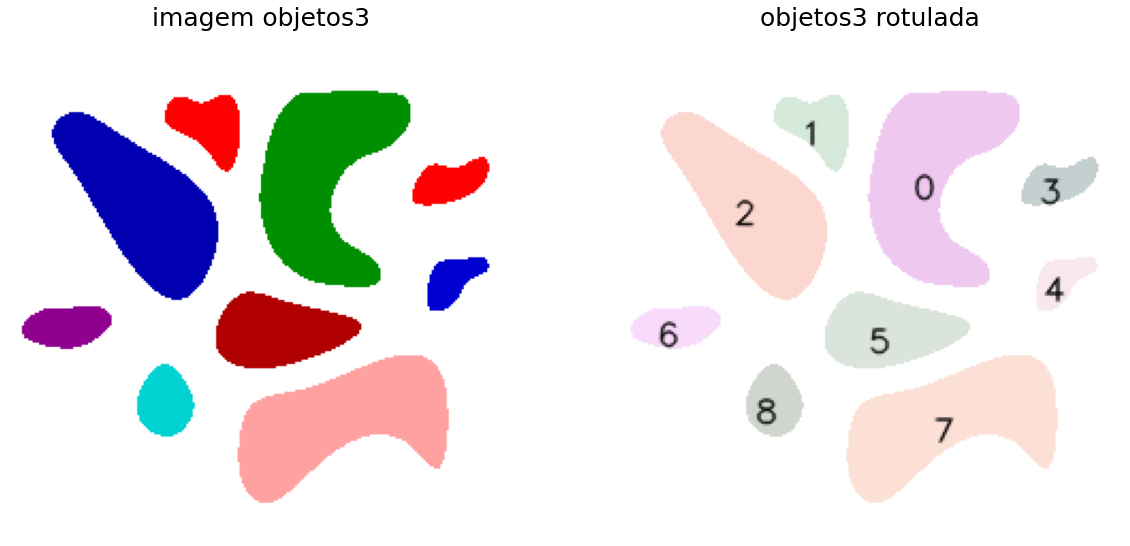

In [16]:
move_values = ((-10.0, 10.0), (-8.0, 10.0), (-8.0, 10.0))
area_values_vec = []
for gray_img, rgb_img, img_contorn, image_name, move_value in zip(gray_images, rgb_images, images_contorns,
                                                                  image_files_path, move_values):
    _, object_area = place_text_to_objects(gray_img, image_name, img_contorn=img_contorn, move_centroid=move_value,
                                           rgb_img=rgb_img, color=(1, 1, 1),
                                           fig_size=(20, 20))
    area_values_vec.append(object_area)

## Parte 3 : Histograma
https://datatofish.com/bar-chart-python-matplotlib/

In [17]:
def get_hist_areas(areas_values: list[int], file_name: str,
                   hist_interval: tuple[int, int] = (1500, 3000)) -> pd.DataFrame:
    """

    Args:
        areas_values:
        file_name:
        hist_interval:

    Returns:

    """

    # Manipulação da string para se obter o nome do arquivo de imagem
    img_name = file_name.split("/")[-1].split(".")[0]

    text_to_print = 50 * "=" + " {} ".format(img_name) + 50 * "="
    print(text_to_print)

    # Inicializando o dataframe que contém a classificação de cada área e a contagem de cada tipo de área
    all_object_areas = {"area": ["pequena", "media", "grande"],
                        "n_objects": [0, 0, 0]
                        }

    for area_value in areas_values:
        if (area_value <= hist_interval[0]):
            all_object_areas["n_objects"][0] += 1
        elif (area_value > hist_interval[0] and area_value <= hist_interval[1]):
            all_object_areas["n_objects"][1] += 1
        else:
            all_object_areas["n_objects"][2] += 1

    df = pd.DataFrame(all_object_areas)

    print("Número de regiões pequenas : {}".format(all_object_areas["n_objects"][0]))
    print("Número de regiões médias : {}".format(all_object_areas["n_objects"][1]))
    print("Número de regiões grandes : {}".format(all_object_areas["n_objects"][2]))

    print(len(text_to_print) * "=" + "\n")

    colors = ["green", "blue", "purple"]
    plt.subplots(figsize=(10, 10))
    plt.bar(df["area"], df["n_objects"], color=colors)
    plt.title("histograma de área dos objetos de {}".format(img_name), fontsize=20)
    plt.xlabel("Valor da área", fontsize=20)
    plt.ylabel("número de objetos", fontsize=20)
    plt.grid(True)
    plt.savefig("ResultadoImagens/Histogramas/{}.png".format(img_name))
    plt.show()

    return df

================================================== objetos1 ==================================================
Número de regiões pequenas : 9
Número de regiões médias : 8
Número de regiões grandes : 0



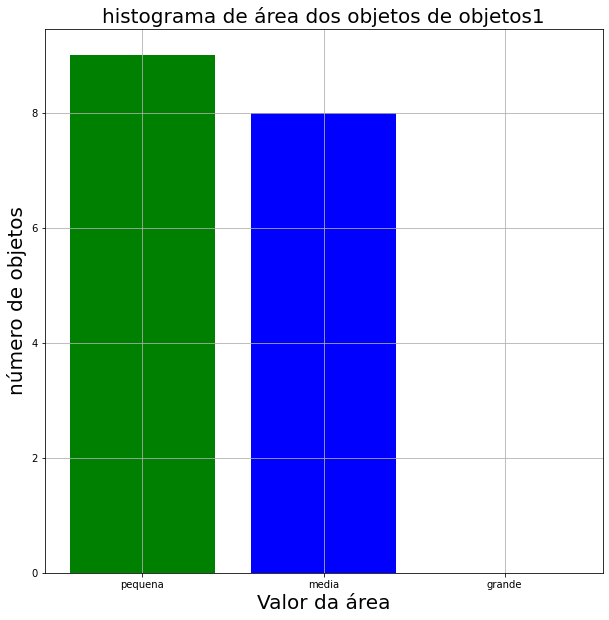

================================================== objetos2 ==================================================
Número de regiões pequenas : 52
Número de regiões médias : 5
Número de regiões grandes : 1



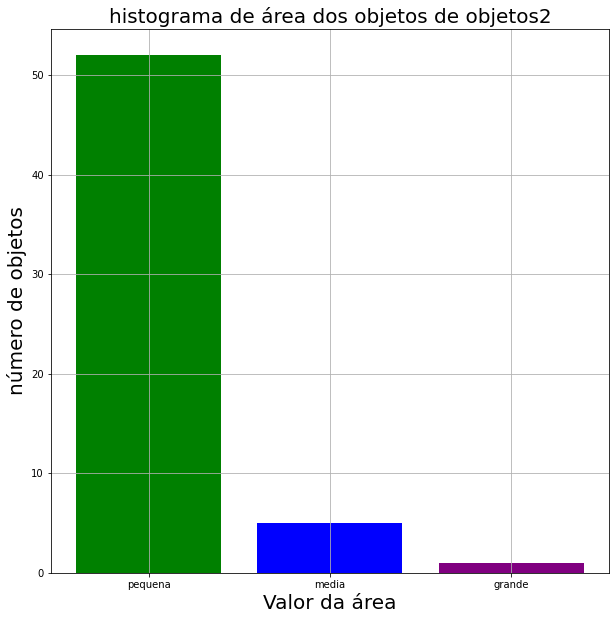

================================================== objetos3 ==================================================
Número de regiões pequenas : 5
Número de regiões médias : 1
Número de regiões grandes : 3



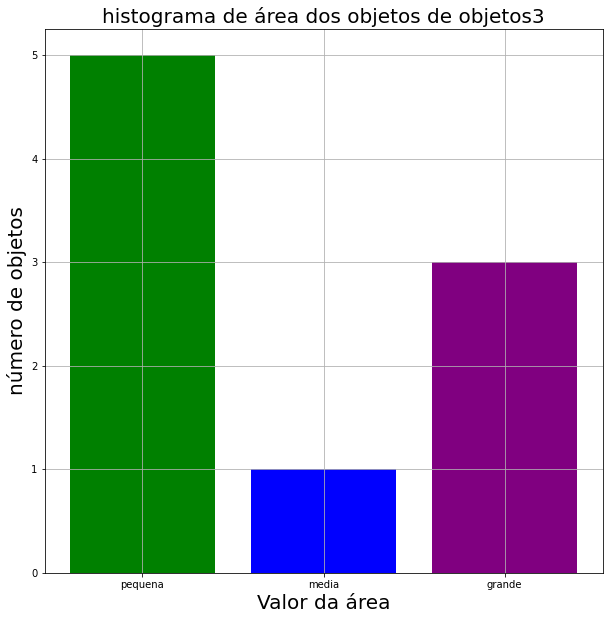

================================================== objetos1 ==================================================
Número de regiões pequenas : 9
Número de regiões médias : 8
Número de regiões grandes : 0



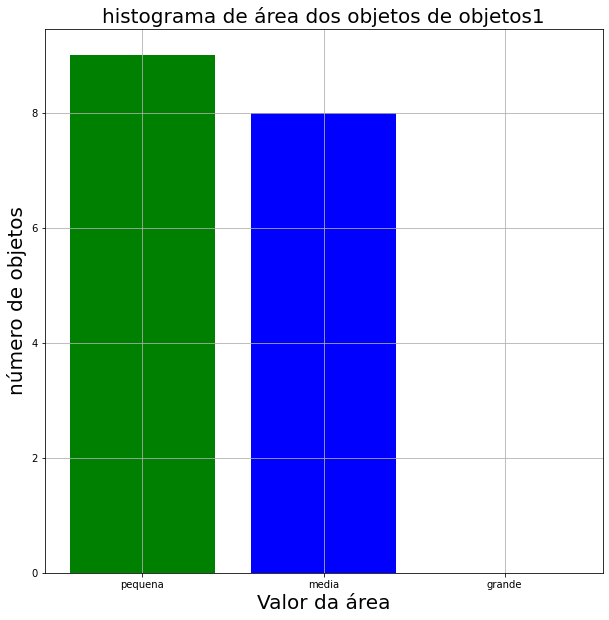

================================================== objetos2 ==================================================
Número de regiões pequenas : 52
Número de regiões médias : 5
Número de regiões grandes : 1



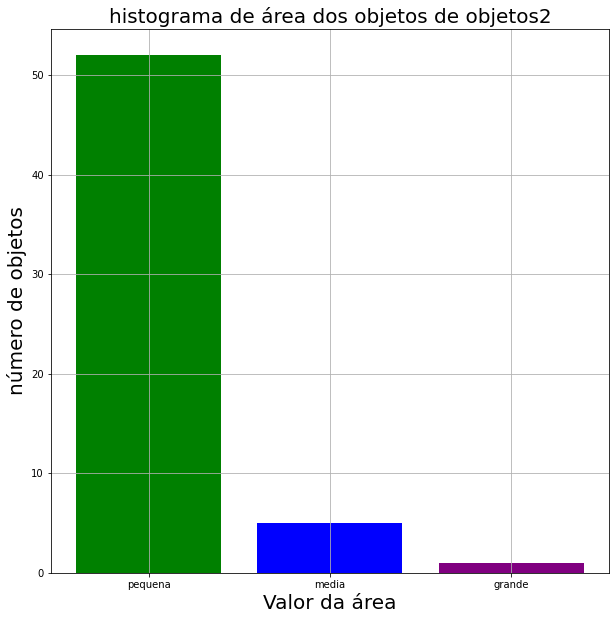

================================================== objetos3 ==================================================
Número de regiões pequenas : 5
Número de regiões médias : 1
Número de regiões grandes : 3



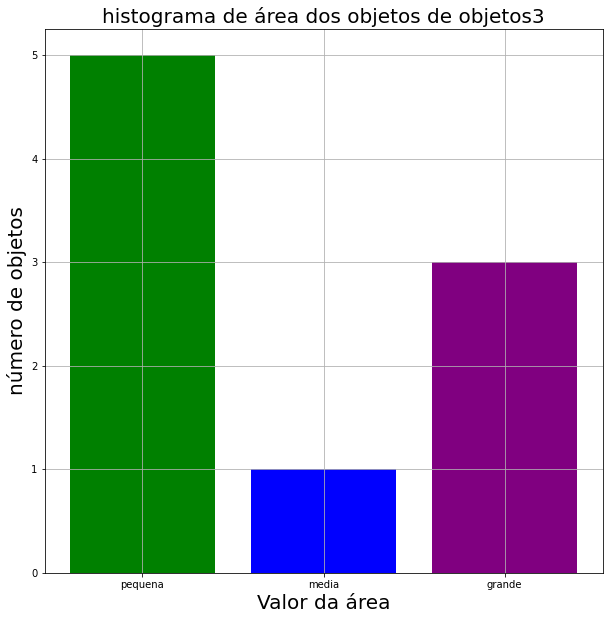

In [18]:
for area_values, img_path in zip(area_values_vec, image_files_path):
    _ = get_hist_areas(area_values, img_path)